**Importing libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import re

**Setting sns style**

In [2]:
# sns.set_style(style='GnBu_d')
sns.set(style = 'darkgrid', palette='deep', rc = {'figure.figsize':(20,10)}) 
#figsize is not a param for sns.set BUT using rc & a dict, possible to add new params

In [3]:
df_pokemon = pd.read_csv(r'data/pokemon.csv')

In [4]:
df_pokemon.head(20)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0    1                  Bulbasaur  Grass  Poison    318  45      49       49   
1    2                    Ivysaur  Grass  Poison    405  60      62       63   
2    3                   Venusaur  Grass  Poison    525  80      82       83   
3    3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4    4                 Charmander   Fire     NaN    309  39      52       43   
5    5                 Charmeleon   Fire     NaN    405  58      64       58   
6    6                  Charizard   Fire  Flying    534  78      84       78   
7    6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8    6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9    7                   Squirtle  Water     NaN    314  44      48       65   
10   8                  Wartortle  Water     NaN    405  59      63       80   
11   9                  Blastoise  Water     NaN    530  79      83      100   
12   9    BlastoiseMega Blastoise  Water     NaN    630  79     103      120   
13  10                   Caterpie    Bug     NaN    195  45      30       35   
14  11                    Metapod    Bug     NaN    205  50      20       55   
15  12                 Butterfree    Bug  Flying    395  60      45       50   
16  13                     Weedle    Bug  Poison    195  40      35       30   
17  14                     Kakuna    Bug  Poison    205  45      25       50   
18  15                   Beedrill    Bug  Poison    395  65      90       40   
19  15      BeedrillMega Beedrill    Bug  Poison    495  65     150       40   

    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        65       65     45           1      False  
1        80       80     60           1      False  
2       100      100     80           1      False  
3       122      120     80           1      False  
4        60       50     65           1      False  
5        80       65     80           1      False  
6       109       85    100           1      False  
7       130       85    100           1      False  
8       159      115    100           1      False  
9        50       64     43           1      False  
10       65       80     58           1      False  
11       85      105     78           1      False  
12      135      115     78           1      False  
13       20       20     45           1      False  
14       25       25     30           1      False  
15       90       80     70           1      False  
16       20       20     50           1      False  
17       25       25     35           1      False  
18       45       80     75           1      False  
19       15       80    145           1      False

**Data Wrangling**

In [5]:
# cleaning row with junk names where Mega pokemons have name doubled
# e.g "VenusaurMega Venusaur" should be "Mega Venusaur; "CharizardMega Charizard X" = "Mega Charizard X".
# same issue with doubling name "Hoopa" - e.g. cf. line 797 & 798

df_pokemon['Name'] = df_pokemon['Name'].apply(lambda row: re.sub(r'\w+Mega', 'Mega', row))

df_pokemon['Name'] = df_pokemon['Name'].apply(lambda row: re.sub(r'(HoopaHoopa)(.+)', 'Hoopa'+r'\2', row))


df_pokemon.tail(10)

#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
790  714            Noibat   Flying  Dragon    245   40      30       35   
791  715           Noivern   Flying  Dragon    535   85      70       80   
792  716           Xerneas    Fairy     NaN    680  126     131       95   
793  717           Yveltal     Dark  Flying    680  126     131       95   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   
795  719           Diancie     Rock   Fairy    600   50     100      150   
796  719      Mega Diancie     Rock   Fairy    700   50     160      110   
797  720    Hoopa Confined  Psychic   Ghost    600   80     110       60   
798  720     Hoopa Unbound  Psychic    Dark    680   80     160       60   
799  721         Volcanion     Fire   Water    600   80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
790       45       40     55           6      False  
791       97       80    123           6      False  
792      131       98     99           6       True  
793      131       98     99           6       True  
794       81       95     95           6       True  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True

In [6]:
# #dropping the '#' column : useless for the following dataviz work
# df_pokemon.drop(columns='#', inplace=True)

**Basic Descriptive Statistics**

In [7]:
df_pokemon.describe().astype(float).round(decimals=2)

#   Total      HP  Attack  Defense  Sp. Atk  Sp. Def   Speed  \
count  800.00  800.00  800.00  800.00   800.00   800.00   800.00  800.00   
mean   362.81  435.10   69.26   79.00    73.84    72.82    71.90   68.28   
std    208.34  119.96   25.53   32.46    31.18    32.72    27.83   29.06   
min      1.00  180.00    1.00    5.00     5.00    10.00    20.00    5.00   
25%    184.75  330.00   50.00   55.00    50.00    49.75    50.00   45.00   
50%    364.50  450.00   65.00   75.00    70.00    65.00    70.00   65.00   
75%    539.25  515.00   80.00  100.00    90.00    95.00    90.00   90.00   
max    721.00  780.00  255.00  190.00   230.00   194.00   230.00  180.00   

       Generation  
count      800.00  
mean         3.32  
std          1.66  
min          1.00  
25%          2.00  
50%          3.00  
75%          5.00  
max          6.00

In [8]:
df_pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
#counting amount of Pokemon per Generation
df_pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [10]:
#Many Pokemon have only One Type but no Type 2
# filling Type 2 = NaN with None

df_pokemon['Type 2'].fillna(value='None', inplace=True)

In [11]:
def combo_type_creator(row):
    if row['Type 2'] =='':
        return row['Type 1']
    else:
        return row['Type 1'] + '-' + row['Type 2']

In [12]:
df_pokemon['Combo_Type'] = df_pokemon.apply(lambda row: combo_type_creator(row), axis=1)

In [13]:
df2 = pd.Series(df_pokemon['Combo_Type'].str.split(pat='-').sum()).value_counts()

df2

None        386
Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Dragon       50
Electric     50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64

The idea of this exercise is to find strongest regular pokemons

Legendary pokemons are, by definition, the strongest pokemons, and are not naturally catchable (in each games, there is only One Legendary pokemon to catch in particular circumstances), therefore let's create a sub df with only regular non-legendary pokemons, in order to have less noisy data

In [14]:
df_regular_pokemon = df_pokemon[df_pokemon['Legendary'] != True].copy()

df_regular_pokemon.drop(columns='Legendary', inplace=True)

spliting datasets into two subdatasets : 
- df_pokedex = all categorical values i.e. ID, name, Generation, Legendary, Type1 & Type2
- df_pokestats = all stats : Type1 & Type2, Total, HP, Attack , Defense, Sp. Atk, Sp. Def, Speed

I want to know which Types are the strongest so I'm keeping both Type variables in both df in order to measure their impact on overall stats

In [15]:
df_pokedex = df_regular_pokemon[['#', 'Name', 'Type 1', 'Type 2', 'Generation']]

df_pokestats = df_regular_pokemon[['#', 'Type 1', 'Type 2','Total', 'HP', 'Attack' , 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

**Which are the Strongest Pokemons ?**

Before doing any particular data processing, let's dive right in : which are the strongest ones ?

In [16]:
df_regular_pokemon.nlargest(n=10, columns='Total').drop_duplicates(subset='#') 
#dropping duplicates # to avoid having duplicates Pokemons with same # (due to evoluion or X/Y Types)

#              Name  Type 1   Type 2  Total   HP  Attack  Defense  \
268  248    Mega Tyranitar    Rock     Dark    700  100     164      150   
409  373    Mega Salamence  Dragon   Flying    700   95     145      130   
413  376    Mega Metagross   Steel  Psychic    700   80     145      150   
494  445     Mega Garchomp  Dragon   Ground    700  108     170      115   
313  289           Slaking  Normal     None    670  150     160      100   
141  130     Mega Gyarados   Water     Dark    640   95     155      109   
283  260     Mega Swampert   Water   Ground    635  100     150      110   
7      6  Mega Charizard X    Fire   Dragon    634   78     130      111   
12     9    Mega Blastoise   Water     None    630   79     103      120   

     Sp. Atk  Sp. Def  Speed  Generation     Combo_Type  
268       95      120     71           2      Rock-Dark  
409      120       90    120           3  Dragon-Flying  
413      105      110    110           3  Steel-Psychic  
494      120       95     92           4  Dragon-Ground  
313       95       65    100           3    Normal-None  
141       70      130     81           1     Water-Dark  
283       95      110     70           3   Water-Ground  
7        130       85    100           1    Fire-Dragon  
12       135      115     78           1     Water-None

**Basic Visualization**

In [17]:
#creating subplot with only 6 features top plot - i.e. dropping Total (sum of 6 features), Generation & Legendary
df_pokemon_features = df_pokemon.drop(columns=['Total', 'Generation', 'Legendary'])

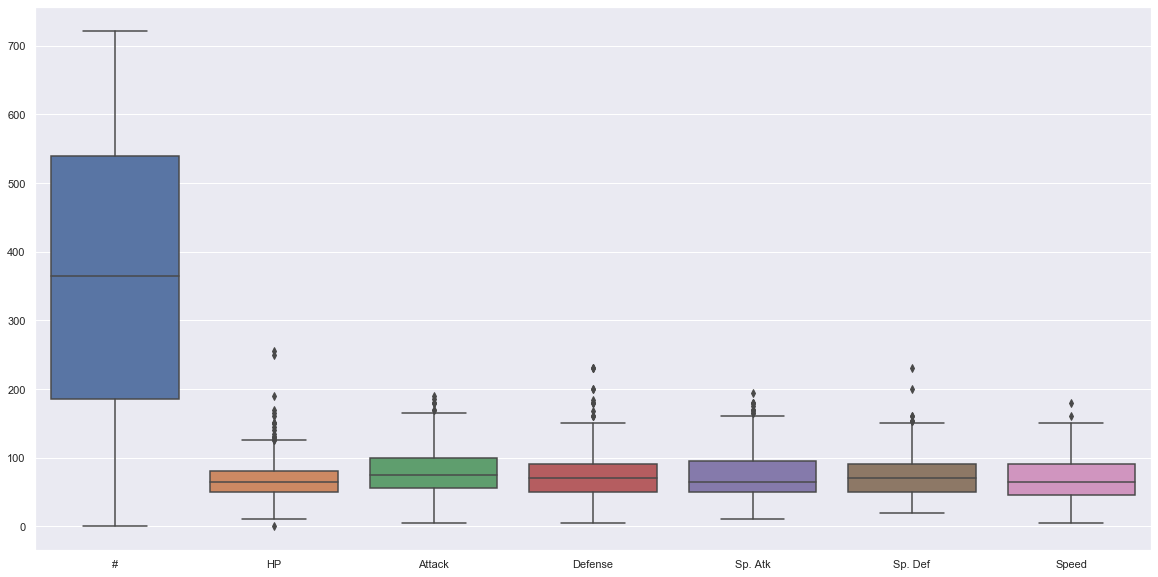

In [18]:
sns.boxplot(data=df_pokemon_features)

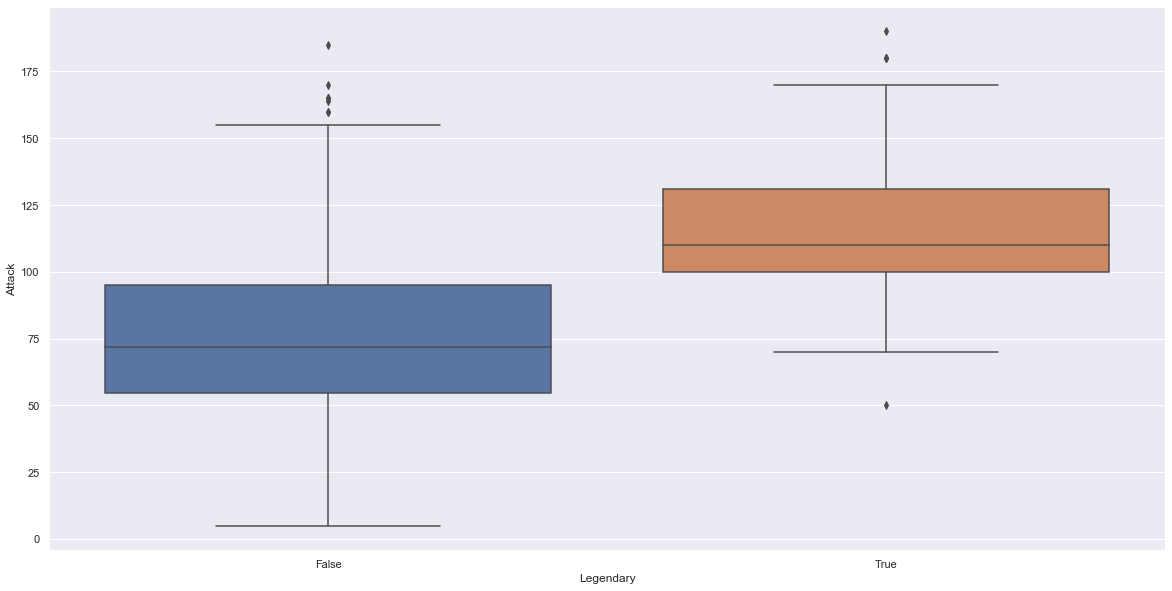

In [19]:
sns.boxplot(x='Legendary', y='Attack', data=df_pokemon)

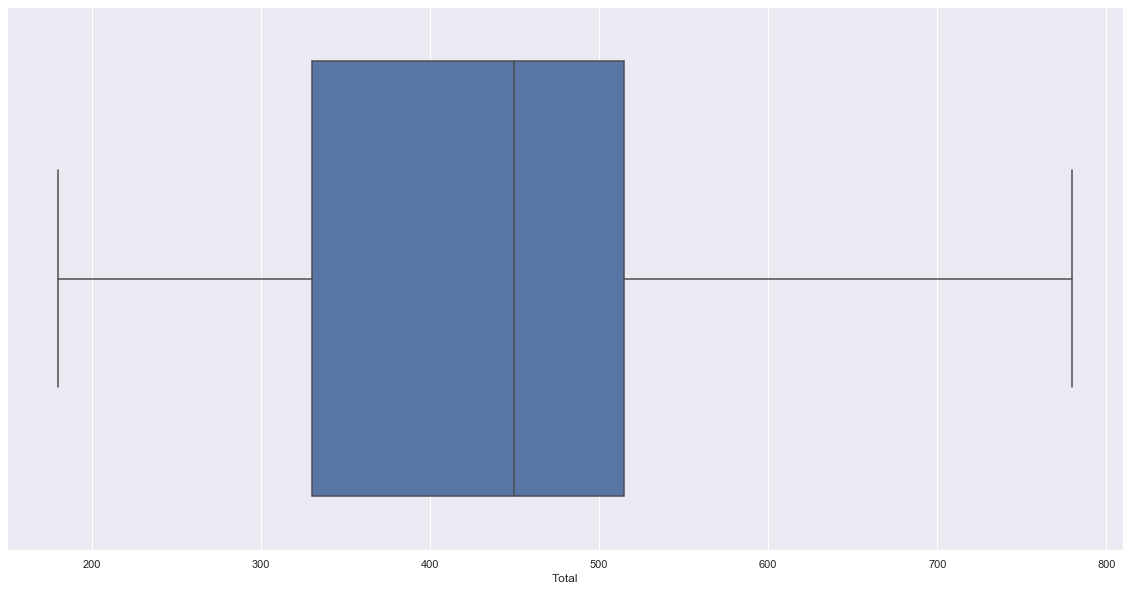

In [20]:
sns.boxplot(df_pokemon['Total'])

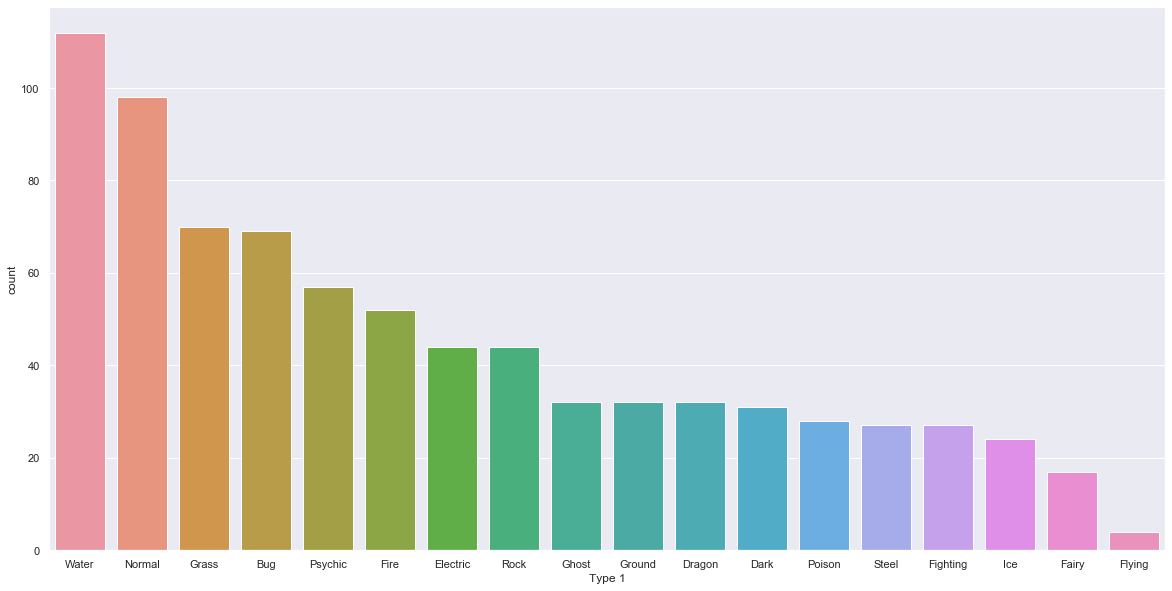

In [21]:
sns.countplot(x='Type 1',
             data=df_pokemon,
             order=df_pokemon['Type 1'].value_counts().index)

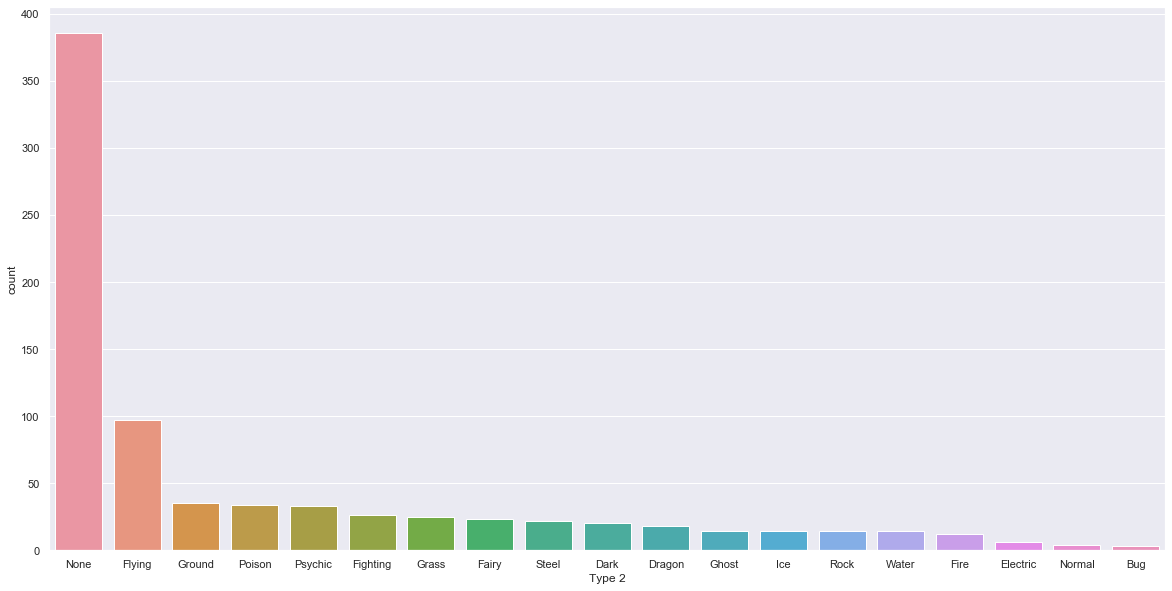

In [22]:
sns.countplot(x='Type 2',
             data=df_pokemon,
             order=df_pokemon['Type 2'].value_counts().index)

In [23]:
# df_pokemon['Combo_Type'].str.split(pat='-').sum().value_counts()

In [24]:
dfcombotype = pd.DataFrame(pd.Series(df_pokemon['Combo_Type'].str.split(pat='-').sum()).value_counts())

dfcombotype.drop('None', inplace=True)

dfcombotype.reset_index(inplace=True)

dfcombotype.columns = ['type', 'count']

In [25]:
dfcombotype

type  count
0      Water    126
1     Normal    102
2     Flying    101
3      Grass     95
4    Psychic     90
5        Bug     72
6     Ground     67
7       Fire     64
8     Poison     62
9       Rock     58
10  Fighting     53
11      Dark     51
12    Dragon     50
13  Electric     50
14     Steel     49
15     Ghost     46
16     Fairy     40
17       Ice     38

In [26]:
fig_type = px.treemap(dfcombotype,
                     path   = ['type'],
                     values = 'count')
fig_type.show()

**Some conclusions**
- Most Pokemon only have 1 Type
- Flying type is underrepresented in Type 1, but is the #1 2nd Type (i.e. many Pokemon have Flying as a complementary Type)
- I would have assumed Normal Type was the most common Type, but in fact Water is the most common one 

In [27]:
dual_pokemon = df_pokedex[df_pokedex['Type 2'] != 'None']

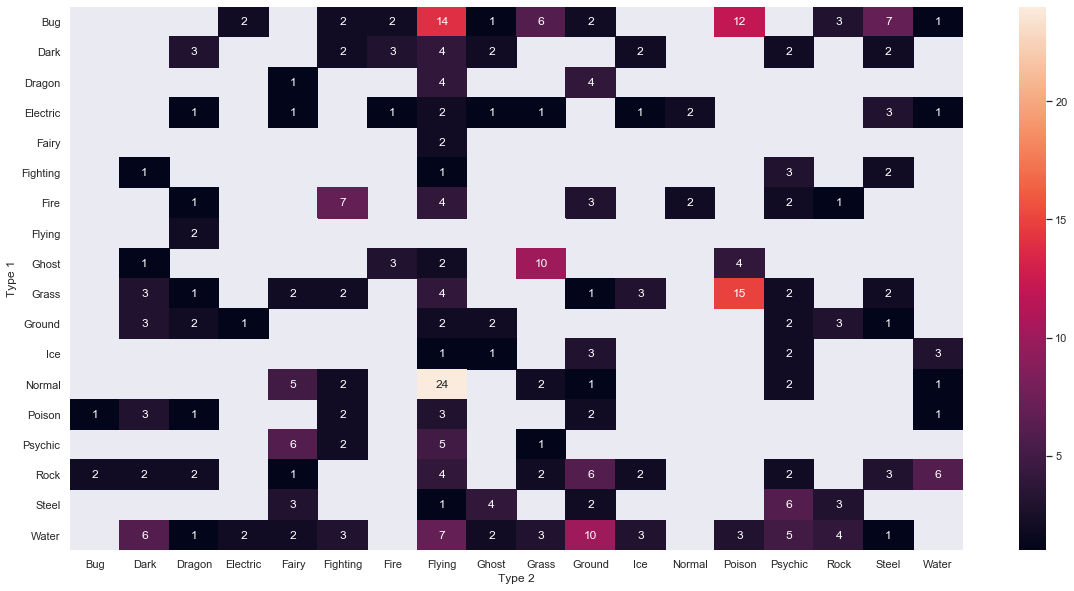

In [28]:
sns.heatmap(dual_pokemon.groupby(['Type 1', 'Type 2']).size().unstack(),
            linecolor='white',
            annot=True)

In [29]:
# # sns.countplot(df_pokemon['Type 1'])

# sns.barplot(kind='bar', data=df_pokemon, stacked=True)

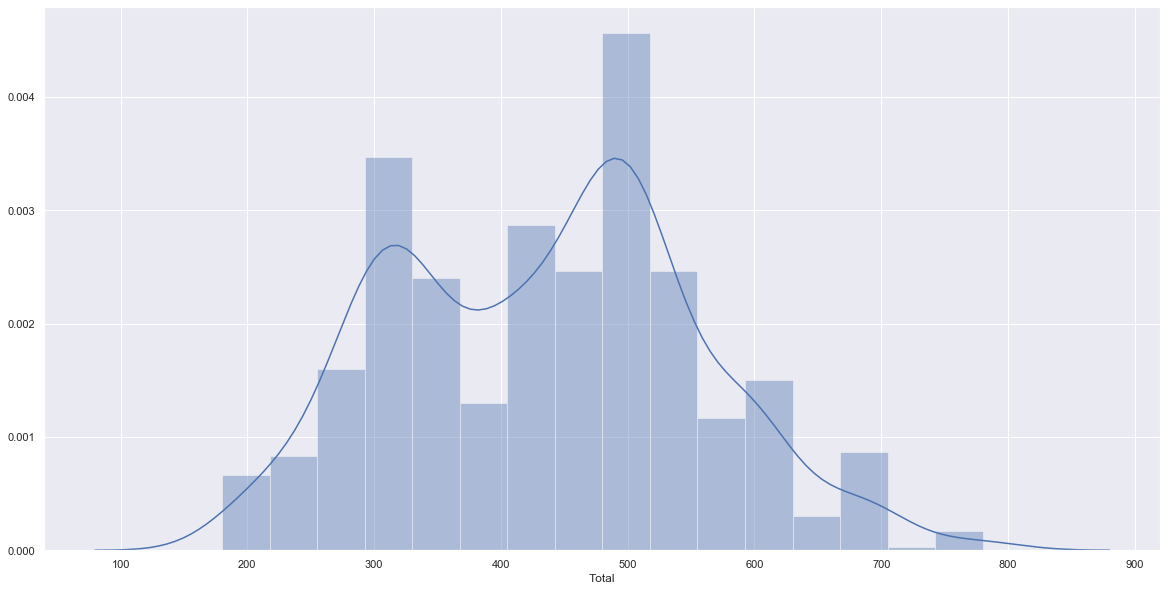

In [30]:
sns.distplot(df_pokemon['Total'])

In [31]:
ff.create_distplot([df_pokemon.Total], ['Total'], bin_size=20)

In [32]:
ff.create_distplot([df_pokemon.Attack, df_pokemon.Defense], ['Attack', 'Defense'], bin_size=5)

In [33]:
fig = px.histogram(df_pokemon, x="Total", 
                   hover_data=df_pokemon.columns)
fig.show()

In [34]:
# hp_distplot = ff.create_distplot([df_pokemon.HP], ['HP'], bin_size=5)
# iplot(hp_distplot, filename='HP Distplot')

# attack_defense_distplot = ff.create_distplot([df_pokemon.Attack, df_pokemon.Defense], ['Attack', 'Defense'], bin_size=5)
# iplot(attack_defense_distplot, filename='Attack/Defense Distplot')

<Figure size 1440x720 with 0 Axes>

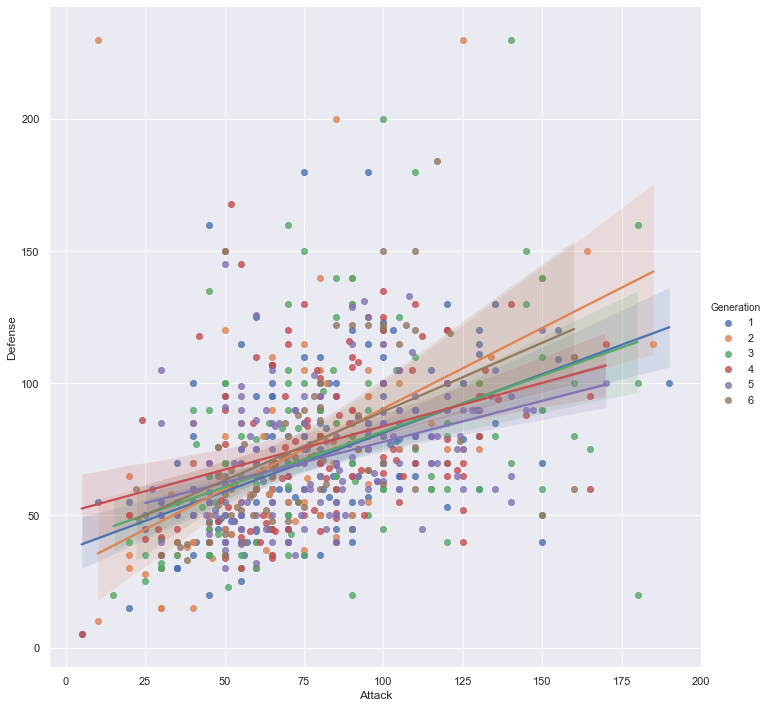

In [53]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Attack', y='Defense', data=df_pokemon,
          hue='Generation',
          height=10, aspect=1)

In [59]:
px.scatter(df_pokemon, x='Attack', y='Defense', size='Total', color='Generation', hover_name='Name')

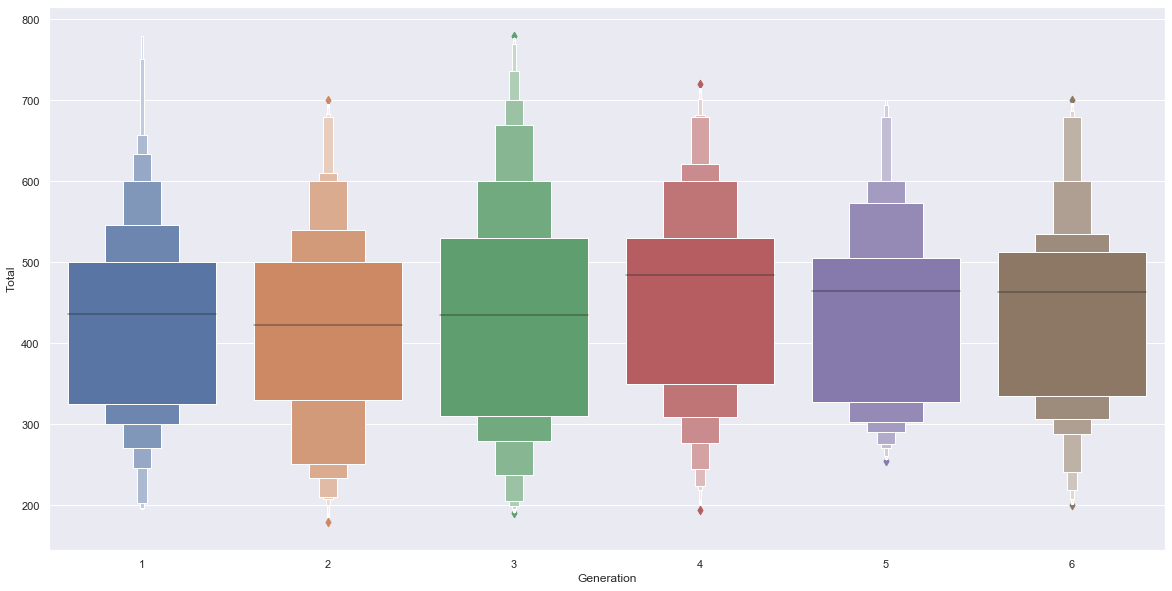

In [36]:
sns.boxenplot(x='Generation', y='Total', data=df_pokemon)

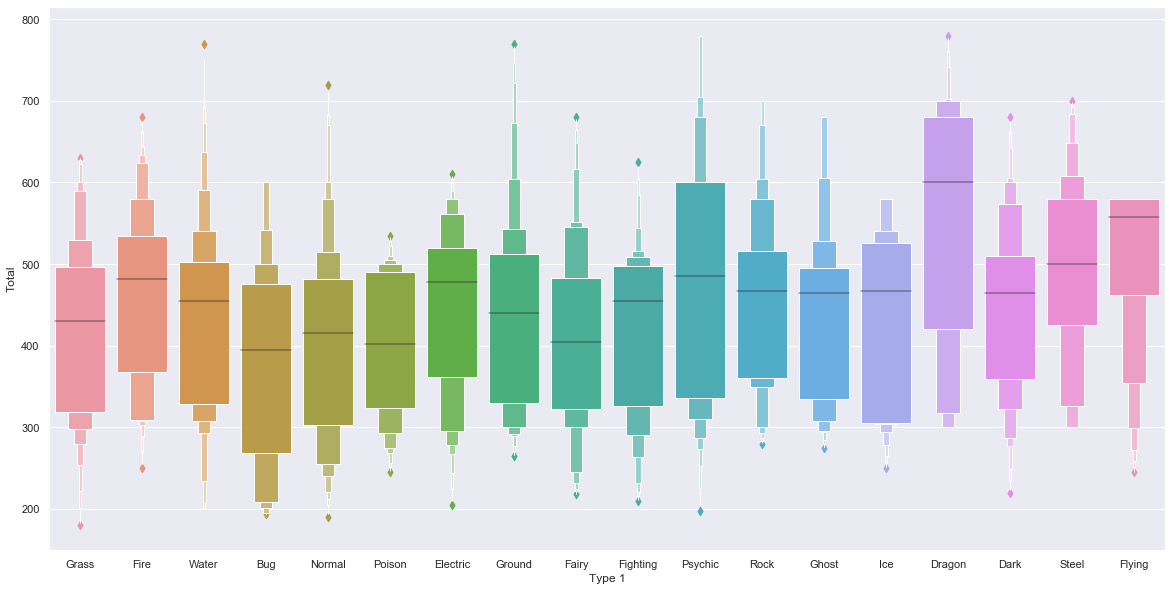

In [37]:
sns.boxenplot(x='Type 1', y='Total', data=df_pokemon)

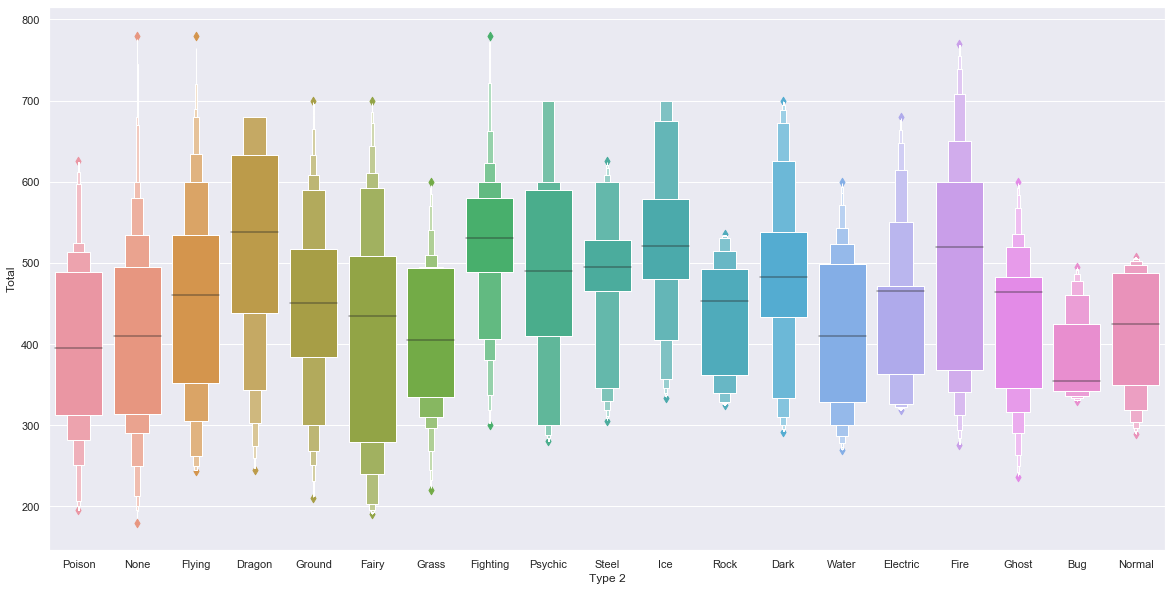

In [38]:
sns.boxenplot(x='Type 2', y='Total', data=df_pokemon)

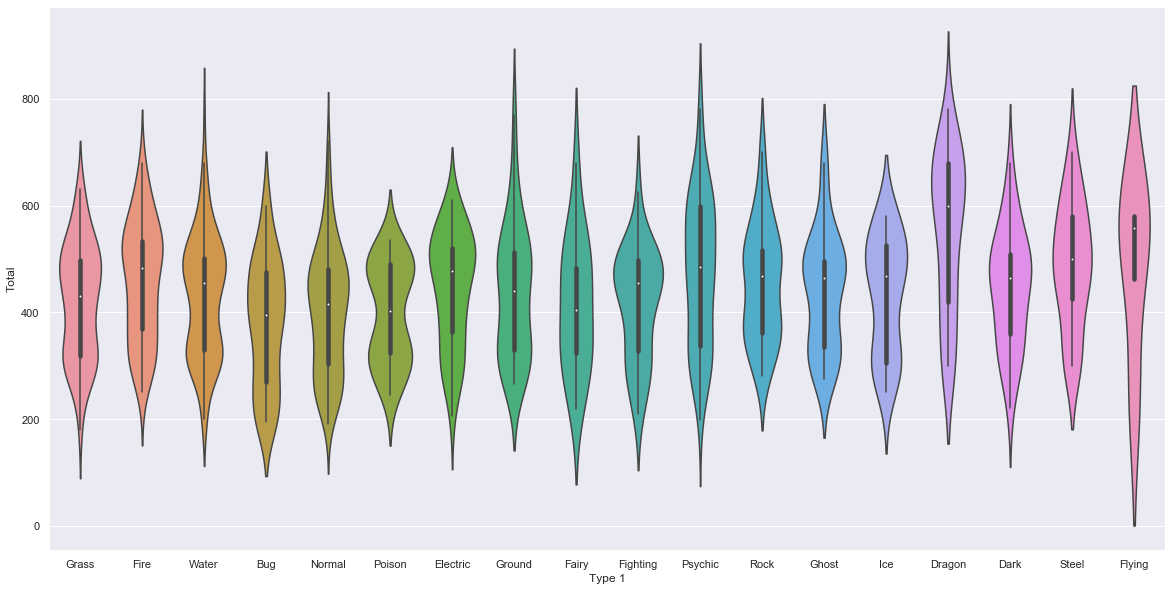

In [39]:
sns.violinplot(x='Type 1', y='Total', data=df_pokemon)

Let's create a Correlation matrix of all 6 features
- The "Total" feature being the sum of all 6 features, it will be by definition strongly correlated to other features
- it might be nonetheless to measure which feature influences the most the "Total" one

In [40]:
df_corr = df_regular_pokemon[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()

In [41]:
df_corr

Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.586473  0.699817  0.608721  0.685697  0.698582  0.520161
HP       0.586473  1.000000  0.377668  0.192426  0.299471  0.337606  0.109847
Attack   0.699817  0.377668  1.000000  0.437192  0.261879  0.211872  0.305346
Defense  0.608721  0.192426  0.437192  1.000000  0.186030  0.475241 -0.040796
Sp. Atk  0.685697  0.299471  0.261879  0.186030  1.000000  0.471164  0.393205
Sp. Def  0.698582  0.337606  0.211872  0.475241  0.471164  1.000000  0.212542
Speed    0.520161  0.109847  0.305346 -0.040796  0.393205  0.212542  1.000000

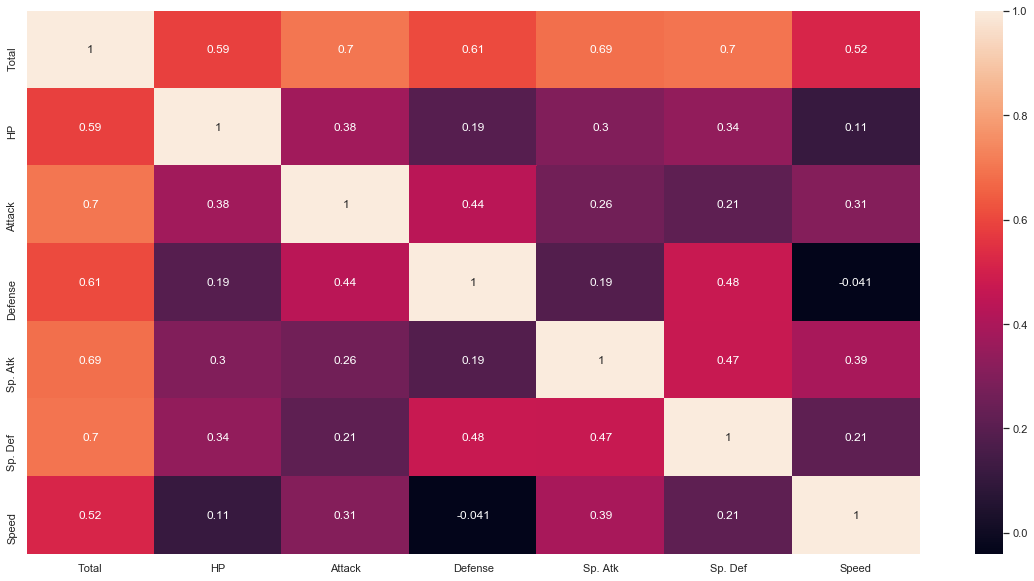

In [42]:
sns.heatmap(df_corr, annot=True)

**Mapping Strongest & Weakest Pokemon types**

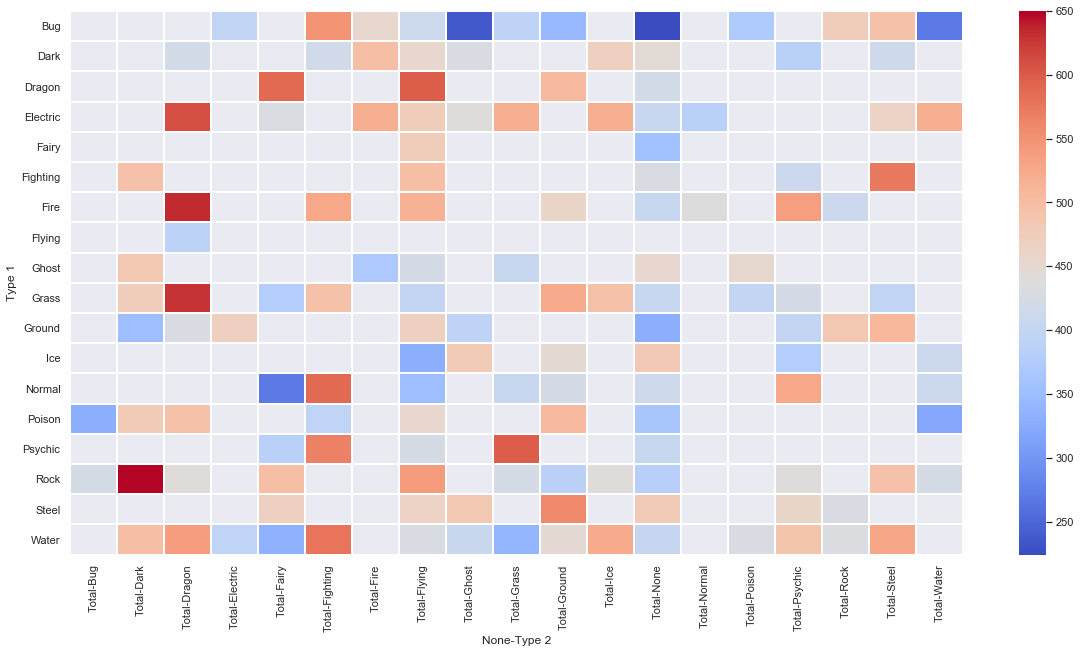

In [43]:
# creating sub df with crossed table of two Types to measure which Type combinations have the strongest & weakest combinations
# measuring over Median of "Total" feature
type_stacked = df_pokestats.groupby(['Type 1', 'Type 2']).agg({'Total':'median'})

sns.heatmap(
            type_stacked.unstack(),
            linewidths=1,
            cmap='coolwarm')

In [44]:
type_stacked.reset_index().sort_values('Total', ascending=False).head(10)

Type 1    Type 2  Total
106      Rock      Dark  650.0
43       Fire    Dragon  634.0
59      Grass    Dragon  630.0
25   Electric    Dragon  610.0
103   Psychic     Grass  600.0
22     Dragon    Flying  600.0
85     Normal  Fighting  590.0
21     Dragon     Fairy  590.0
128     Water  Fighting  580.0
42   Fighting     Steel  575.0

**Mapping Types VS. Features**

Are there importance infuence between Types & features ? i.e. are there certain Types which outperform with particular features ?

In [45]:
# creating new sub df focusing over Type 1 VS. 6 Features
# grouping by only Type 1 over Median for all 6 features - from .loc() HP to Speed  
# (adding 2nd type to the group by would generate a too hard to read heatmap with too many variables)

feature_stacked = df_regular_pokemon.groupby(['Type 1']).median().loc[:,'HP':'Speed']

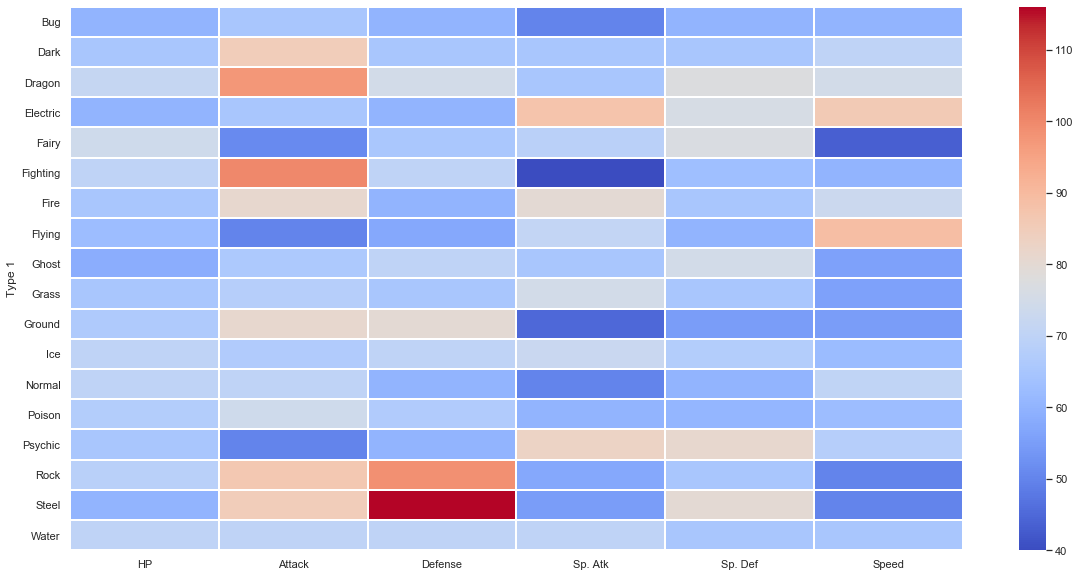

In [46]:
sns.heatmap(feature_stacked,
            linewidths=1,
            cmap='coolwarm'
            )

Text(0.5, 1, 'Plot4: Speed VS. Sp. Defense')

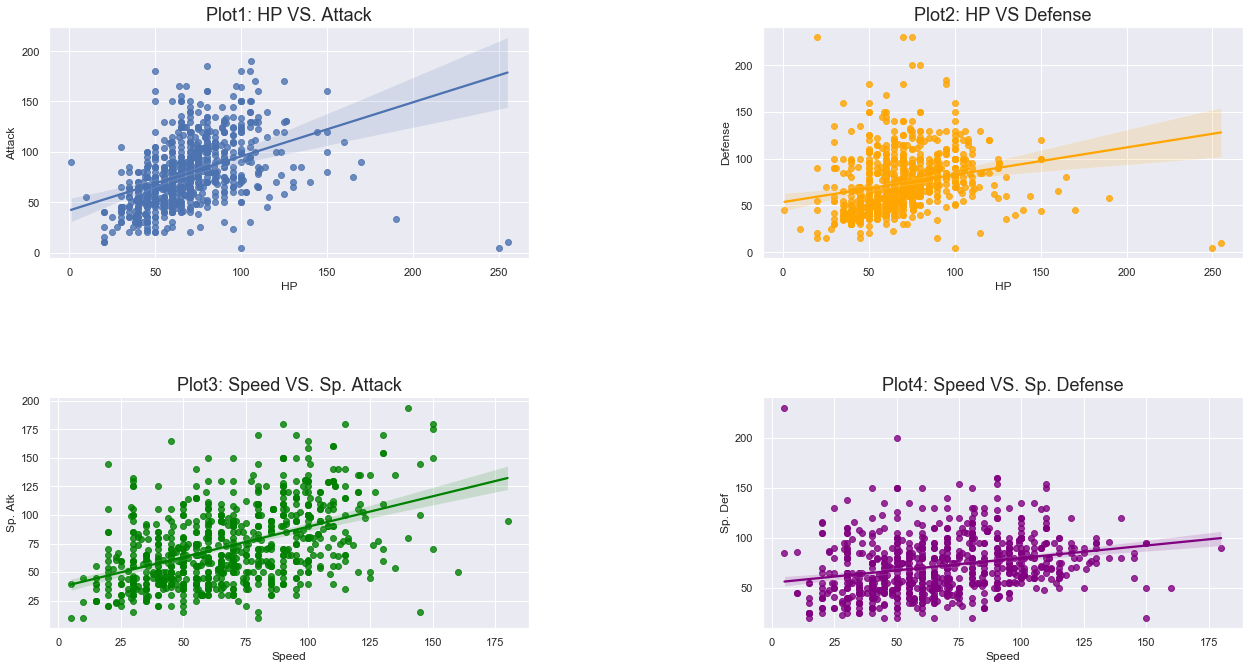

In [47]:
fig, axs = plt.subplots(2,2, figsize=(20,10)) #3 by 3 subplots

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((8,8), (0,4), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (4,4), rowspan=3, colspan=3)

sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, ax=ax1)

sns.regplot(x='HP', y='Defense', 
              data=df_pokemon, ax=ax2,  color = 'orange')

sns.regplot(x='Speed', y='Sp. Atk', 
              data=df_pokemon, ax=ax3,  color = 'green')

sns.regplot(x='Speed', y='Sp. Def', 
              data=df_pokemon, ax=ax4, color = 'purple')

fig.tight_layout() # To understand how this works see point and link 3

ax1.set_title("Plot1: HP VS. Attack", fontsize =18)
ax2.set_title("Plot2: HP VS Defense", fontsize =18)
ax3.set_title("Plot3: Speed VS. Sp. Attack", fontsize =18)
ax4.set_title("Plot4: Speed VS. Sp. Defense", fontsize =18)

<ipython-input-48-6271f949857d>:24: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.



Text(0.5, 1.0, 'Plot4: Speed VS. Sp. Defense')

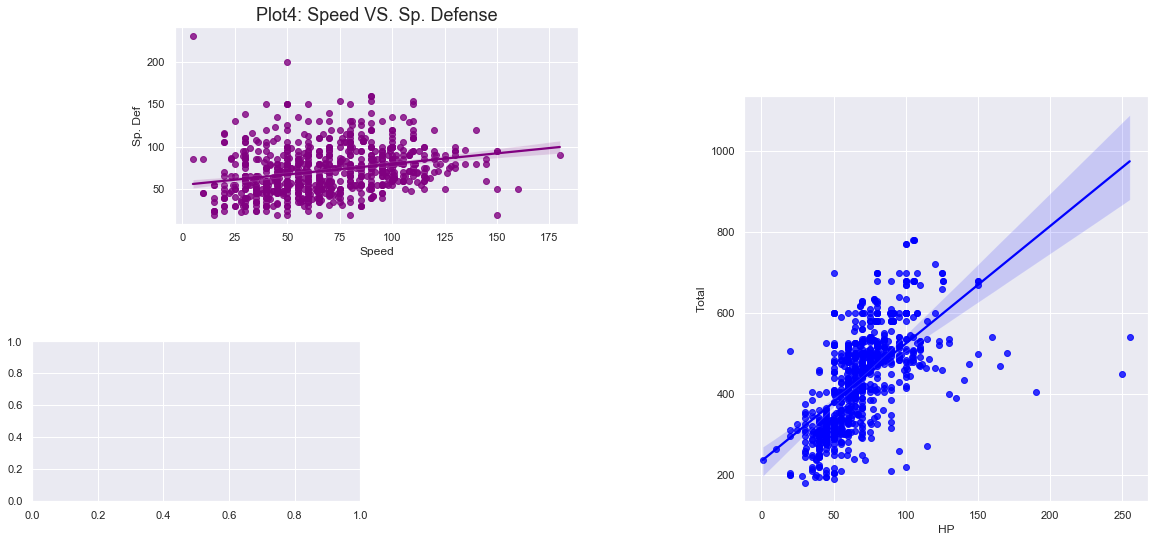

In [48]:
fig, axs = plt.subplots(3,3, figsize=(20,10)) #3 by 3 subplots

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((8,8), (0,1), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (1,0), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (1,1), rowspan=3, colspan=3)
ax5 = plt.subplot2grid((8,8), (2,5), rowspan=6, colspan=6)

sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, ax=ax1)

sns.regplot(x='HP', y='Defense', 
              data=df_pokemon, ax=ax2,  color = 'orange')

sns.regplot(x='Speed', y='Sp. Atk', 
              data=df_pokemon, ax=ax3,  color = 'green')

sns.regplot(x='Speed', y='Sp. Def', 
              data=df_pokemon, ax=ax4, color = 'purple')

sns.regplot(x='HP', y='Total', 
              data=df_pokemon, ax=ax5, color = 'blue')

fig.tight_layout() # To understand how this works see point and link 3

ax1.set_title("Plot1: HP VS. Attack", fontsize =18)
ax2.set_title("Plot2: HP VS Defense", fontsize =18)
ax3.set_title("Plot3: Speed VS. Sp. Attack", fontsize =18)
ax4.set_title("Plot4: Speed VS. Sp. Defense", fontsize =18)

In [49]:
# sns.pairplot(data=df_pokemon)

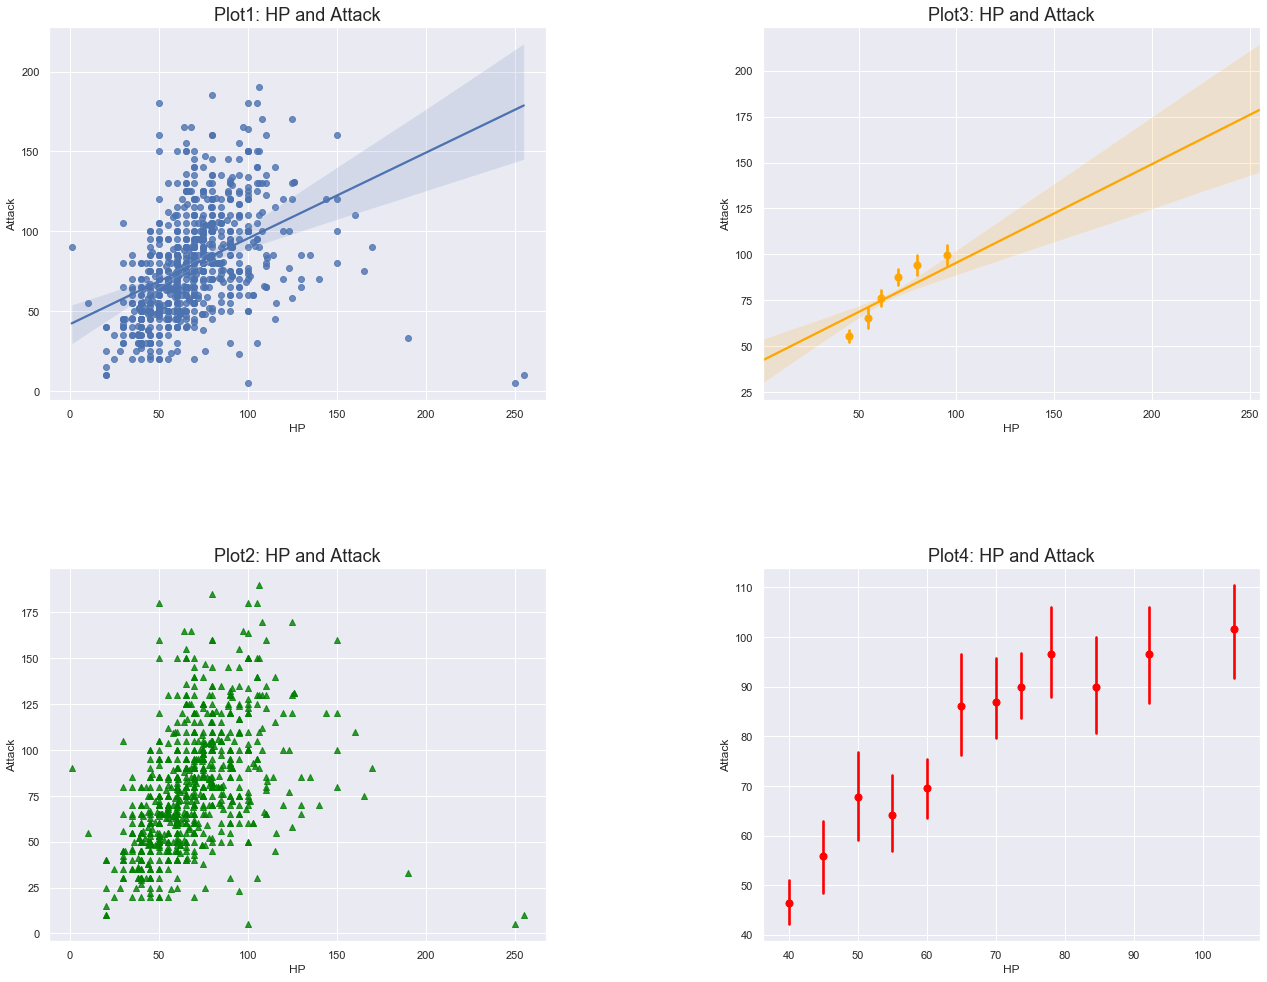

In [50]:
fig, axs = plt.subplots(3, 3, figsize = (20,15)) #plt.subplots() first two arguements are the number
# of rows and then the number of columns. The [figsize =] adjusts the size of the final output of graphs.
# See point and link 2 

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0, 4), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (4, 4), rowspan=3, colspan=3)

# ^Each one of the above ax commands positions each graph spot within a grid. 
# For a better understanding see point and link 4


fig.tight_layout() # To understand how this works see point and link 3

ax1.set_title("Plot1: HP and Attack", fontsize =18)
ax2.set_title("Plot2: HP and Attack", fontsize =18)
ax3.set_title("Plot3: HP and Attack", fontsize =18)
ax4.set_title("Plot4: HP and Attack", fontsize =18)

# ^The above code purely sets the title of each graph and the fontsize



# Plot 1
sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, ax=ax1) #x_bins = 12, fit_reg = True, ci = 95, 
              #color = 'red', marker ="^", ax=ax1) 
# Notice the x and y are set columns of the poke dataset. The [ax =]
# is added because we have subplots and Python needs to know where to put this graph.
# But this graph has no customization, just the bare bones. 


# Plot 2 
sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, fit_reg = False, color = 'green', marker ="^", ax=ax2)
# We're going to add some parameters. We'll add a [color =], [fit_reg =],
# [marker =] command to our function. The [color =] command let's us control the color 
# of the graph and the points. The [fit_reg =] command allows use to turn on/off the linear
# regression and just see the points. The default is True, unless we change it to False.
# The final addition is the [marker =] command, this changes the marker used on the graph to 
# mark the points.


# Plot 3
sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, fit_reg = True, x_bins = 6, color = 'orange', ax=ax3)
# We're going to add some parameters still. Now we're adding the [x_bins =] command, and changing
# [fit_reg =] to True. The [x_bins =] commands seperates our data into bins, the number given is the number
# of bins the data is sepperated into. The [x_bins =] command also gives a confidence interval
# to the bins. This confidence interval is the verticle line running through the point. 
# The default is confidence interval is 95%, but that can be changed if needed. So in this plot
# we have 6 points each with a confidence interval, and linear regression running through
# our data. 


# Plot 4
sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, fit_reg = False, x_bins = 12, ci = 99, color = 'red', ax=ax4)
# I like what we did with the last graph, so I'm going to add to that. But I don't like
# the line running through the data, I want the graph to be red, I want more bins, and I 
# want the confidence on each point to be 99% percent instead of 95%. To do this I turned
# [fit_reg =] to False, [color =] to 'red', [x_bins =] to 12, and introduced a new command, 
# the [ci =] command. This command sets the confidence interval of both the bins AND the line.
# In this exampe we don't have a linear fit to the data, so the [ci =] will only effect the bins.



plt.show()